In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Multiplcation example

In [2]:
sess = tf.Session()
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
y = tf.multiply(a, b)
print("{:.1f} shold equal {} * {}".format(sess.run(y, feed_dict={a:1, b:2}), "a = 1", "b = 2"))
print("{:.1f} shold equal {} * {}".format(sess.run(y, feed_dict={a:3, b:3}), "a = 3", "b = 3"))
sess.close()

2.0 shold equal a = 1 * b = 2
9.0 shold equal a = 3 * b = 3


# Simple Linear Regression

### Training data

In [3]:
num_sample = 20
X_train = np.linspace(0, 1, num_sample)
weight = 1
bias = 1
noise_level = 0.1

print(X_train.shape)
print(*X_train.shape)
print(np.random.rand(*X_train.shape))

(20,)
20
[ 0.28228582  0.21702372  0.30822157  0.46163373  0.82063166  0.93782892
  0.14397738  0.98263476  0.54469073  0.1310988   0.77587423  0.63961989
  0.62798489  0.3593021   0.35426343  0.20302997  0.95308152  0.04073018
  0.96605318  0.91614488]


In [4]:
Y_true = X_train * weight + bias
Y_train = Y_true + np.random.rand(*X_train.shape) * noise_level

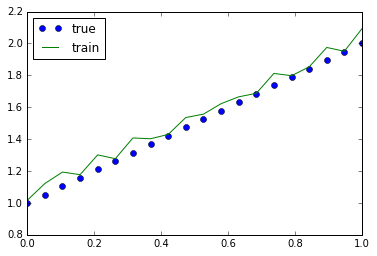

In [5]:
plt.figure(1)
plt.plot(X_train, Y_true, "bo", label="true")
plt.plot(X_train, Y_train, "g-", label="train")
plt.legend(loc=0) #plt.legend(["true", "train"])
plt.show()

### Tensorflow graph

In [6]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [7]:
weight = tf.Variable(tf.cast(weight, tf.float32))
bias = tf.Variable(tf.cast(bias, tf.float32))
linear_regression_model = tf.multiply(X, weight) + bias

In [8]:
# loss function
loss_function = tf.reduce_mean(tf.square(Y - linear_regression_model))

# optimzer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)
train_op = optimizer.minimize(loss_function)

In [9]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [10]:
for i in range(1000):
    sess.run(train_op, feed_dict={X:X_train, Y:Y_train})
    if i % 100 == 0:
        print("weight: {:0.4f}, bias: {:0.4f}".format(*sess.run([weight, bias])))
        print("loss: {:0.4f}".format(sess.run(loss_function, feed_dict={X:X_train, Y:Y_train})))

weight: 1.0021, bias: 1.0044
loss: 0.0026
weight: 1.0030, bias: 1.0418
loss: 0.0011
weight: 0.9957, bias: 1.0457
loss: 0.0011
weight: 0.9922, bias: 1.0476
loss: 0.0011
weight: 0.9906, bias: 1.0485
loss: 0.0011
weight: 0.9897, bias: 1.0489
loss: 0.0011
weight: 0.9894, bias: 1.0491
loss: 0.0011
weight: 0.9892, bias: 1.0492
loss: 0.0011
weight: 0.9891, bias: 1.0493
loss: 0.0011
weight: 0.9890, bias: 1.0493
loss: 0.0011


In [11]:
W, b = sess.run([weight, bias])

In [12]:
sess.close()

## Result

In [13]:
print("W: {}  |  type: {}".format(W, type(W)))
print("b: {}  |  type: {}".format(b, type(b)))

W: 0.9890119433403015  |  type: <class 'numpy.float32'>
b: 1.0493061542510986  |  type: <class 'numpy.float32'>


In [14]:
Y_pred = np.dot(X_train, W) + b
print(Y_pred)

[ 1.04930615  1.10135941  1.15341267  1.20546593  1.25751919  1.30957246
  1.36162572  1.41367898  1.46573224  1.5177855   1.56983876  1.62189202
  1.67394528  1.72599854  1.7780518   1.83010506  1.88215832  1.93421158
  1.98626484  2.0383181 ]


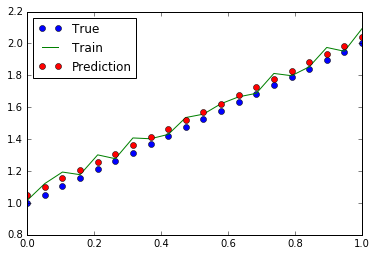

In [15]:
plt.figure(1)
plt.plot(X_train, Y_true, "bo", label="True")
plt.plot(X_train, Y_train, "g-", label="Train")
plt.plot(X_train, Y_pred, "ro", label="Prediction")
plt.legend(loc=0) #plt.legend(["True", "Train", "Prediction"])
plt.show()